<a href="https://colab.research.google.com/github/mevangelista-alvarado/machine_learning/blob/main/SVM_primer_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

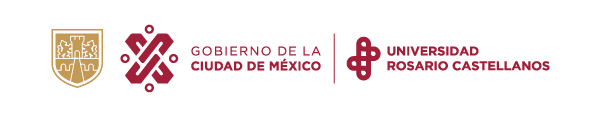

**Actualizado:** Noviembre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Introducción

En este Google Colab mostramos una implementación de Máquinas de Vectores de Soporte en un ejemplo simple en Python.   

### Introducción

Las máquinas de vectores de soporte _(SVM, por sus siglas en inglés)_ son modelos de aprendizaje supervisados que analizan datos para clasificación y análisis de regresión.  


Fueron desarrollados en AT&T Bell Laboratories por V. Vapnik y C. Cortes alrededor de 1995 en el trabajo  
[Redes de vectores de soporte](https://link.springer.com/article/10.1007/BF00994018).  



### Máquinas de Vectores de Soporte (SVM)

La estructura fundamental de las SVM implica la definición de un hiperplano óptimo que maximiza la separación entre las clases en el espacio de características.



Las SVM son excelentes para conjuntos de datos relativamente pequeños con menos valores atípicos y generalmente se usa como un algoritmo de clasificación.

### Estructura de los SVM

* **Hiperplano de Separación:**  
  El objetivo principal de las SVM es encontrar un hiperplano que maximice la separación entre las clases del conjunto de datos.
   
   Un hiperplano es un subespacio de una dimensión menos que el espacio de características.
   
   En un espacio bidimensional, el hiperplano es una línea; en un espacio tridimensional, es un plano, y así sucesivamente.

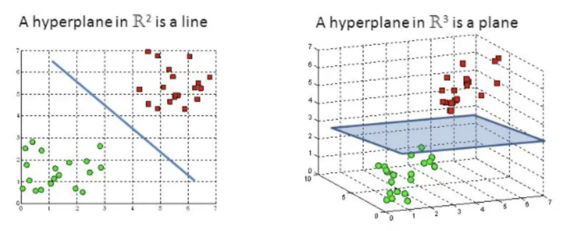

* **Vectores de Soporte:**  
   Los vectores de soporte son los puntos de datos más cercanos al hiperplano y son críticos para la definición de este. La optimización se centra en encontrar el hiperplano que maximice la distancia (margen) entre estos vectores de soporte.

* **Margen:**  
   El margen es la distancia perpendicular desde el hiperplano hasta los puntos más cercanos (vectores de soporte). La SVM busca maximizar este margen para mejorar la generalización y la capacidad de clasificación del modelo.

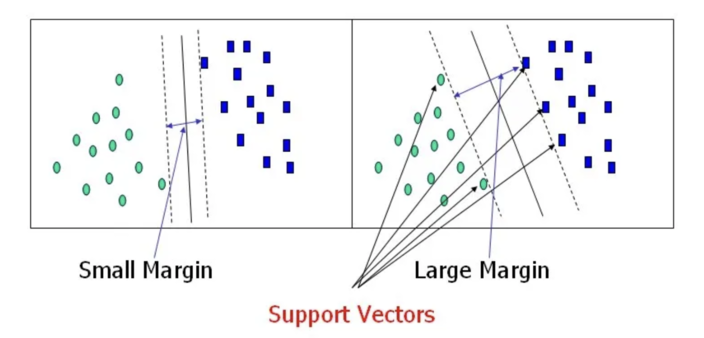

* **Función de Decisión:**  
   La función de decisión de una SVM se basa en el signo de la distancia de un punto al hiperplano.
   
   Por ejemplo, para una SVM lineal, la función de decisión es $$f(x) = \text{sign}(\langle w, x \rangle - b),$$
   
   donde $w$ es el vector de pesos, $x$ es el vector de entrada, $b$ es el término de sesgo y $\langle \cdot, \cdot \rangle$ denota el producto escalar entre dos vectores.

* **Kernel Trick:**  
  Los conjuntos de datos pueden no ser linealmente separables en el espacio de características original.
  
  El truco del kernel permite proyectar los datos a un espacio de características de mayor dimensión donde la separación lineal puede ser más efectiva. Los kernels comunes incluyen el kernel lineal, polinómico y de base radial (RBF).


La estructura de una SVM implica la definición de un hiperplano que maximiza el margen de separación entre las clases en un espacio de características. Esta característica de maximización del margen es lo que hace que las SVM sean poderosas para clasificar datos, especialmente cuando las clases son complejas y no linealmente separables.




## Kernels

El kernel es una función que cuantifica la similitud entre dos instancias en el espacio de características. Puedes pensar en él como una forma de transformar los datos originales en un espacio donde sea más fácil encontrar un hiperplano de separación lineal.



Algunos kernels comunes son:

1. **Lineal:**  
   $$K(\mathbf{x}, \mathbf{y}) = \mathbf{x}^T \mathbf{y}$$

   Este es el kernel más simple. La función de decisión resultante es un hiperplano lineal en el espacio de características original.
   
   Es adecuado para conjuntos de datos que son linealmente separables.

2. **Polinómico:**  
   $$K(\mathbf{x}, \mathbf{y}) = (\mathbf{x}^T \mathbf{y} + c)^d$$

   Este kernel utiliza una función polinómica para transformar el espacio de características. El parámetro $d$ controla el grado del polinomio, y $c$ es un término constante.
   
   Puede capturar relaciones no lineales entre las características, pero es importante ajustar adecuadamente $d$ y $c$ para evitar el sobreajuste.

3. **RBF (Radial Basis Function):**  
   $$ K(\mathbf{x}, \mathbf{y}) = exp(\gamma||x-y||^{2})$$

   Existen muchos tipos, pero el más conocido y utilizado es el kernel gaussiano, esto es útil para capturar patrones no lineales. El parámetro $\gamma$ controla la forma de la función radial.
   
   Este kernel asigna un peso decreciente a las instancias a medida que se alejan entre sí en el espacio de características. Es especialmente útil cuando no se conoce la forma exacta de la frontera de decisión.


La elección del kernel depende de la naturaleza de los datos y del problema.

## Implementación en `Python`

Importamos los módulos necesarios

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos el conjunto de datos de cáncer de mama utilizando `load_breast_cancer` y asignamos las características a `X` y las etiquetas a `y`.

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

Obtenemos la información del dataset

In [ ]:
print(cancer.DESCR)

El conjunto es el diagnóstico de cáncer de mama de Wisconsin. Para mayor información consulte https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba utilizando el método `train_test_split`.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

El 80% se utiliza para entrenamiento y el 20% para pruebas.

Creamos un clasificador SVM con un kernel lineal y lo entrenamos con los datos de entrenamiento.

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

Realizamos predicciones en el conjunto de prueba y calculamos la precisión del modelo comparando las predicciones con las etiquetas reales.

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Calculamos la matriz de confusión

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

Hacemos la matriz de forma visual con `matplotlib`

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

La matrix de confusion se lee de la siguiente manera:

|                     | Predicción Positiva | Predicción Negativa |
|---------------------|----------------------|----------------------|
| **Etiqueta Positiva**   | Verdaderos Positivos   | Falsos Negativos      |
| **Etiqueta Negativa**   | Falsos Positivos      | Verdaderos Negativos  |


Donde:

* Verdaderos Positivos:  
  Instancias positivas correctamente clasificadas.

* Verdaderos Negativos:
  Instancias negativas correctamente clasificadas.

* Falsos Positivos:  
  Instancias negativas incorrectamente clasificadas como positivas.

* Falsos Negativos:  
  Instancias positivas incorrectamente clasificadas como negativas.

Esta tabla proporciona una representación visual de cómo se distribuyen las predicciones en función de las clases reales en un problema de clasificación binaria.